<a href="https://colab.research.google.com/github/Prakshi598/Test-and-train/blob/main/Train_and_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Big Mart Sales Analysis

DESCRIPTIONS:

*LOADING OF DATA

*DATA STRUCTURES AND FUNCTIONS

*DATA PREPROCESSING

*EXPLARATORY ANALYSIS

*TO HANDLE THE MISSING AND CATEGORICAL VALUES

*HANDLING THE OUTLIERS

*FEATURE ENGINEERING

*MODEL BUILDING

In [ ]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.

#Loading of data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#mount the data from drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Big_Mart Dataset/Train.csv')
#reads the data in train dataset

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Big_Mart Dataset/Test.csv')
#reads the data in test dataset

Data structure and content

In [ ]:
train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(8523, 12)

In [ ]:
train.columns
#Returns the labels of the DataFrame columns as an Index object.

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train.isnull().sum()
#Counts the number of missing (NaN) values in each column of the DataFrame.

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
train.dtypes
#Returns the data types of each column in the DataFrame.

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
train.duplicated()
 #Checks for any duplicate rows in the DataFrame and returns a boolean Series.

,0
0,False
1,False
2,False
3,False
4,False
...,...
8518,False
8519,False
8520,False
8521,False


In [ ]:
train.info
#Displays a summary of the DataFrame including the number of non-null entries, data types, and memory usage.

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]>

In [ ]:
train.describe()
#Provides summary statistics of the train DataFrame.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
train['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5681, 11)

In [ ]:
test.columns
#Returns the labels of the DataFrame columns as an Index object.

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
test.isnull().sum()
#Counts the number of missing (NaN) values in each column of the DataFrame.

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1606
Outlet_Location_Type,0


In [ ]:
test.dtypes
#Returns the data types of each column in the DataFrame.

,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [ ]:
test.duplicated()
#Checks for any duplicate rows in the DataFrame and returns a boolean Series.

,0
0,False
1,False
2,False
3,False
4,False
...,...
5676,False
5677,False
5678,False
5679,False


In [ ]:
test.info()
#Displays a summary of the DataFrame including the number of non-null entries, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
test.describe()
#Provides summary statistics of the train DataFrame.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test['Item_Type'].value_counts()

,count
Item_Type,
Snack Foods,789
Fruits and Vegetables,781
Household,638
Frozen Foods,570
Dairy,454
Baking Goods,438
Canned,435
Health and Hygiene,338
Meat,311


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


#Data structure and content

#Data processing

In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
train['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
train['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
test['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
test['Item_Fat_Content'].replace(['LF','low fat','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [ ]:
test['Item_Fat_Content'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Low Fat
1       Regular
2       Low Fat
3       Low Fat
4       Regular
         ...   
5676    Regular
5677    Regular
5678    Low Fat
5679    Regular
5680    Regular
Name: Item_Fat_Content, Length: 5681, dtype: object>

#Explamatory data analysis

Uni variate analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

#importing the required libraries for the Analysis of the project.

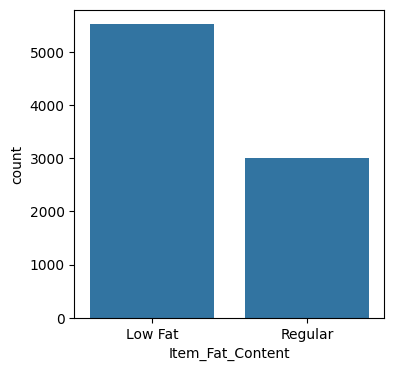

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='Item_Fat_Content',data=train)
plt.xlabel('Item_Fat_Content')
plt.show()

The above plot represents the Item_Fat_Content.From this we can see that the low fat contents are highily consumed and regular is around the half of low fat content

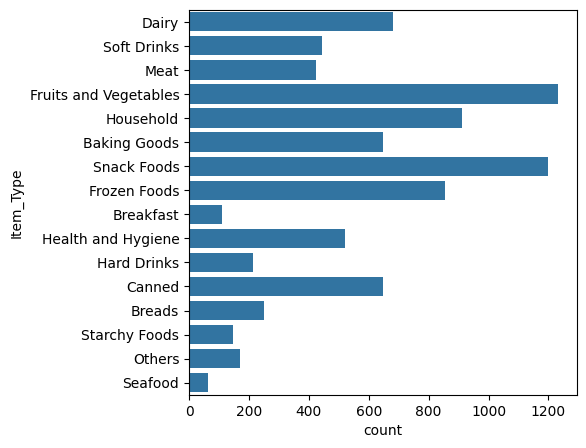

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(y='Item_Type',data=train)
plt.ylabel('Item_Type')
plt.show()

The above plot represents Item_Type where fruits and vegetables and snack foods are highly consumed whereas breakfast and seafood are lowly consumed

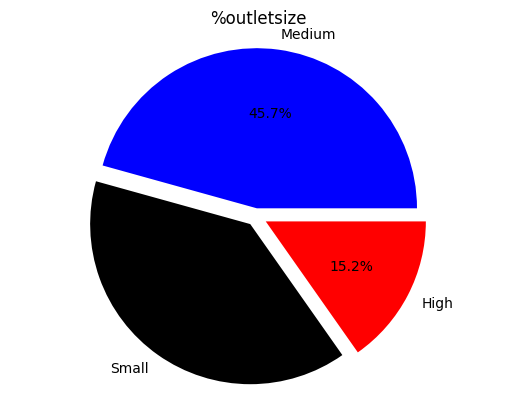

In [ ]:
outletsize=train['Outlet_Size'].value_counts(normalize=True)*100
explode=(0.05,0.06,0.07)
colors=('blue','black','red')
plt.pie(outletsize,labels=outletsize.index,autopct='%1.1f%%',explode=explode,colors=colors)
plt.title('%outletsize')
plt.axis('equal')
plt.show()

The above plot represents about the outletsize.The largest proportion of the outletsize falls into the medium category,the next largest proportion of the outletsize falls into small category and the high category shows the small proportion of the outletsize

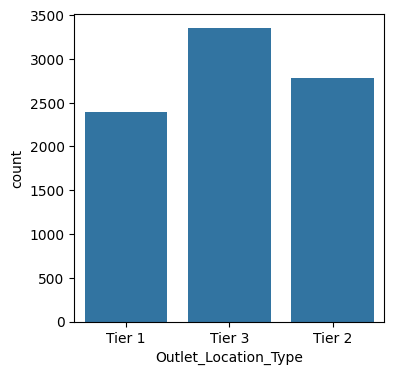

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='Outlet_Location_Type',data=train)
plt.xlabel('Outlet_Location_Type')
plt.show()

The above plot shows the count of Outlet_Location

-Type which consists of three tiers.Tier 1 ranges about 2500,Tier 2 ranges about 3500 and Tier 3 ranges about 3000

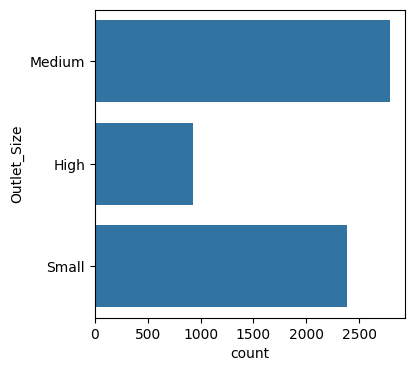

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(y='Outlet_Size',data=train)
plt.ylabel('Outlet_Size')
plt.show()

The above plot shows the Outlet
-size of the data.medium category reaches around 2500,high and small category reaches around 1000 and 2500

#To handle the missing and categorical values

In [ ]:
# To handle the missing and null values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [ ]:

le=LabelEncoder()
for col in train.columns:
    if train[col].dtype=='object':
        train[col]=le.fit_transform(train[col])

In [ ]:
train['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [ ]:
train.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
train[missing_coloums]=imputer.fit_transform(train[missing_coloums])

In [ ]:
train.isnull().sum()
#identifies the null values in train dataset

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
le=LabelEncoder()
for col in test.columns:
  if test[col].dtype=='object':
    test[col]=le.fit_transform(test[col])

In [ ]:
test['Outlet_Size'].dtypes
#display the data type of 'Outlet_Size' column

dtype('int64')

In [ ]:
test.head()
#display updated few rows of the datasets

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
imputer=SimpleImputer(strategy='mean')
missing_coloums=['Item_Weight','Outlet_Size']
test[missing_coloums]=imputer.fit_transform(test[missing_coloums])

In [ ]:

# select columns with missing values
cols_with_missing = ["Item_Weight", 'Outlet_Size']

In [ ]:
test.isnull().sum()
#identifies the null values in test dataset

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


#handling the outliers

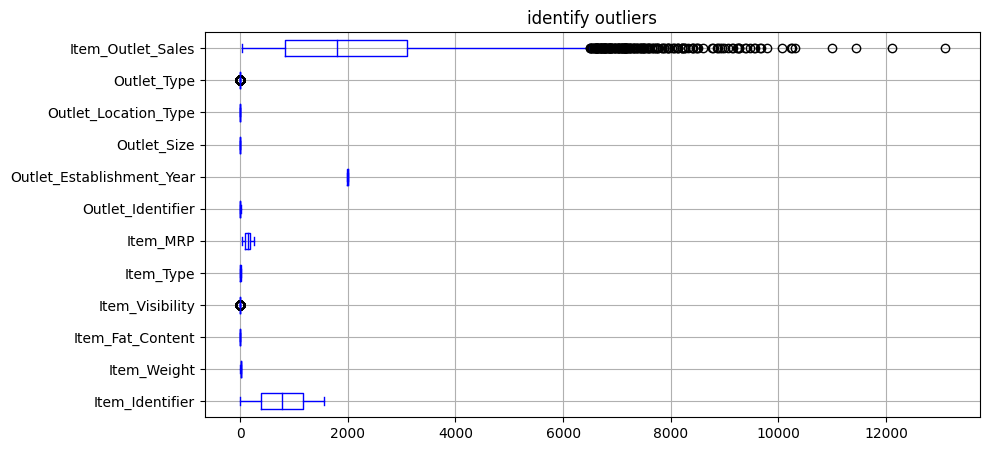

In [ ]:
number_coloumns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

The above plot has outliers somewhat around 6000 for Item_Outlet_Sales

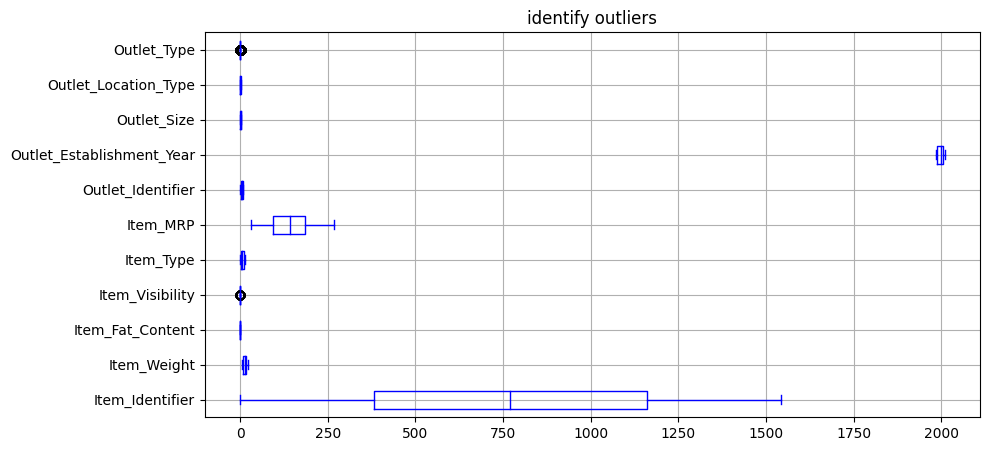

In [ ]:
number_coloumns=test.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_coloumns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

The above plot does not have outliers

In [ ]:
q1=np.percentile(train['Item_Outlet_Sales'],25)
q3=np.percentile(train['Item_Outlet_Sales'],75)
iqr=q3-q1
print('q1',q1)
print('q3',q3)
print('IQR',iqr)

q1 834.2474
q3 3101.2964
IQR 2267.049


In [ ]:
upperlimit=q3+1.5*iqr
lowerlimit=q1-1.5*iqr
print('upperlimit',upperlimit)
print('lowerlimit',lowerlimit)

upperlimit 6501.8699
lowerlimit -2566.3261


Cube transformation

In [ ]:
train['Outlet_Sales_Square']=np.sqrt(train['Item_Outlet_Sales'])
#Creates a new column 'Outlet_Sales_Square' with the square root of values from 'Item_Outlet_Sales'.

In [ ]:
train['Outlet_Sales_Cube']=np.cbrt(train['Item_Outlet_Sales'])
#Creates a new column 'Outlet_Sales_Cube' with the cube root of values from 'Item_Outlet_Sales'.

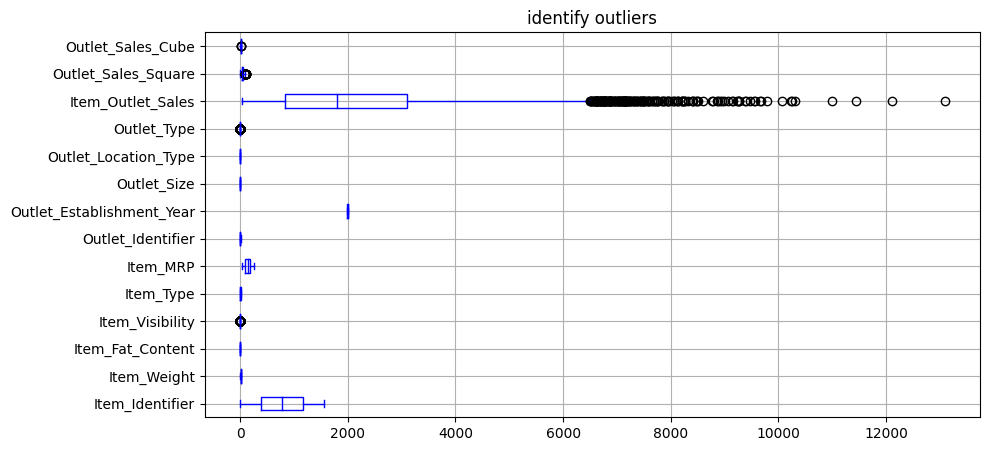

In [ ]:
number_columns=train.select_dtypes(include=['int64','float64'])
fig,ax=plt.subplots(figsize=(10,5))
number_columns.boxplot(ax=ax,vert=False,color='blue')
plt.title('identify outliers')
plt.show()

The above plot has outliers somewhat around 6000 for Item_Outlet_Sales

Bi variate Analysis

<ipython-input-63-21a5397159ca>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

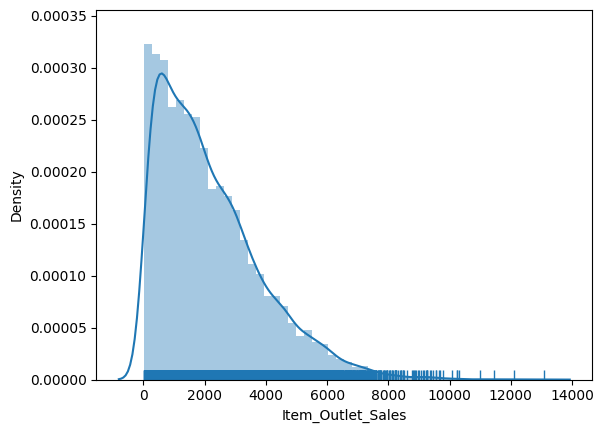

In [ ]:
sns.distplot(a=train['Item_Outlet_Sales'],kde=True ,rug=True)
#Plots the distribution of 'Item_Outlet_Sales' with a kernel density estimate (KDE) and a rug plot using Seaborn.

For the above plot the bell curve reaches the peak around 0.00030 for Item_Outlet_Sales and does not look much like a bell curve

<ipython-input-64-87da33ca1820>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)


<Axes: xlabel='Outlet_Sales_Cube', ylabel='Density'>

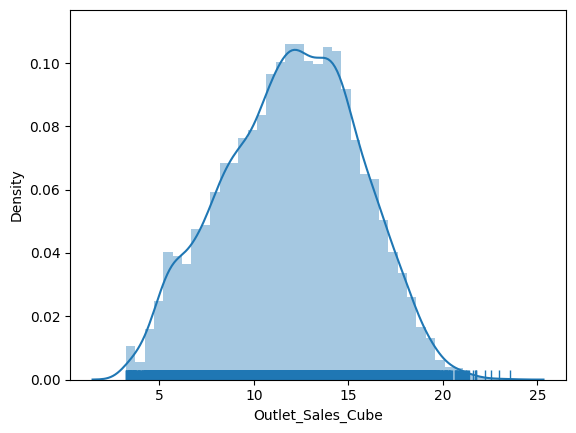

In [ ]:
sns.distplot(a=train['Outlet_Sales_Cube'],kde=True ,rug=True)
#Plots the distribution of 'Outlet_Sales_Cube' with a kernel density estimate and a rug plot using Seaborn.

For the above plot it reaches its peak at around 0.10 for Outlet_Sales_Cube and it looks like a bell curve

In [ ]:

# Subset the dataset to include only the relevant columns
subset = train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
             'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
 'Item_Outlet_Sales','Outlet_Sales_Cube']]

In [ ]:
# Calculate the correlation matrix
corr = subset.corr()

In [ ]:
# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

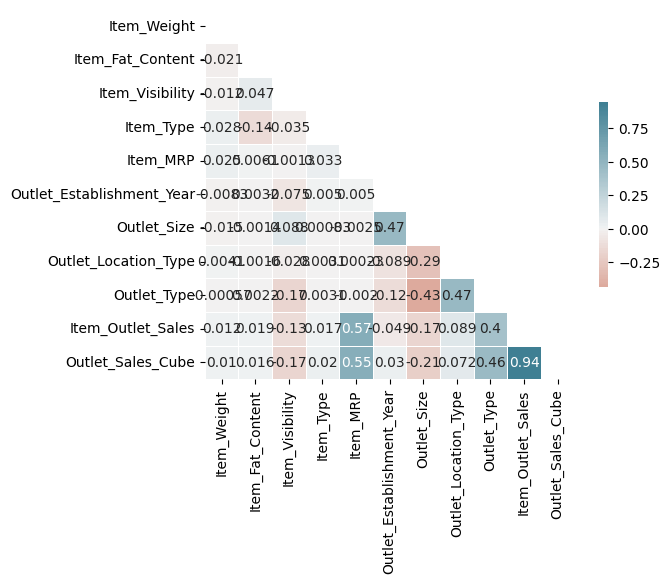

In [ ]:
# Generate the heatmap with green and white colors
sns.heatmap(corr, mask=mask, annot=True, cmap=sns.diverging_palette(20, 220, n=200),
            center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Item_outlet_Sales is positively corelated with Outlet_Size and Item_Outlet_Sales

#Feature engineering

In [ ]:
train.head()

#Shows the first few rows of train dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,61.115775,15.515611
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,21.057607,7.625576
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,45.795961,12.800240
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,27.062520,9.013888
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,31.538947,9.982319


In [ ]:
train['Outlet_Age']=train['Outlet_Establishment_Year'].apply(lambda year: 2024-year)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Square,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,0.016047,4,249.8092,9,1999,1.0,0,1,3735.1380,61.115775,15.515611,25
1,8,5.92,1,0.019278,14,48.2692,3,2009,1.0,2,2,443.4228,21.057607,7.625576,15
2,662,17.50,0,0.016760,10,141.6180,9,1999,1.0,0,1,2097.2700,45.795961,12.800240,25
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3.0,2,0,732.3800,27.062520,9.013888,26
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0.0,2,1,994.7052,31.538947,9.982319,37


In [ ]:
train=train.drop(['Item_Visibility','Outlet_Sales_Square'],axis=1)

In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Sales_Cube,Outlet_Age
0,156,9.30,0,4,249.8092,9,1999,1.0,0,1,3735.1380,15.515611,25
1,8,5.92,1,14,48.2692,3,2009,1.0,2,2,443.4228,7.625576,15
2,662,17.50,0,10,141.6180,9,1999,1.0,0,1,2097.2700,12.800240,25
3,1121,19.20,1,6,182.0950,0,1998,3.0,2,0,732.3800,9.013888,26
4,1297,8.93,0,9,53.8614,1,1987,0.0,2,1,994.7052,9.982319,37


In [ ]:
test.head()
#Shows the first few rows of test dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1.0,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,3.0,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,3.0,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,3.0,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1.0,2,3


In [ ]:
from sklearn.preprocessing import StandardScaler
#importing the required libraries for the Analysis of the project.

In [ ]:
x=train[['Item_Fat_Content','Item_Type','Item_MRP','Outlet_Location_Type','Outlet_Type','Outlet_Age']]
y=train ['Outlet_Sales_Cube']

In [ ]:
Scaler=StandardScaler
#Initializes a standard scaler for feature normalization.

In [ ]:
x=scaler.fit_transform(x)

NameError: name 'scaler' is not defined

In [ ]:
x=pd.DataFrame(x)

In [ ]:
x.head()
#shows the first few rows of x dataset

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0,4,249.8092,0,1,25
1,1,14,48.2692,2,2,15
2,0,10,141.6180,0,1,25
3,1,6,182.0950,2,0,26
4,0,9,53.8614,2,1,37


In [ ]:
print(type(x))
#Outputs the data type of the variable x.

<class 'pandas.core.frame.DataFrame'>


#Building a model

Using simple linear regression algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
# For evaluating the models using the metrics
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection  import cross_val_score as CVS

In [ ]:
# Define the linear regression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(x, y)

# Precting the model using the test set
y_predict = lr.predict(x)

# Evaluating the training set with the metric values

print("R-Square value on the training set: = ", lr.score(x,y))
print("----------------------------------------------------------------------------------------------")

# Use cross-validation to get the R-squared score
scores = CVS(lr, x, y, cv=5)
print('CV R-squared scores:', scores,"\n")
print('Average CV R-squared score:', np.mean(scores),"\n")

#Saving the model

In [ ]:
import pickle
#importing the required libraries for the Analysis of the project.

In [ ]:
Bigmart= "BigMart_Analysis.sav"
pickle.dump(lr, open(Bigmart,'wb'))

NameError: name 'pickle' is not defined

#Summary

   * In Bigmart Sales Analysis we started with downloading and uploading the datasets .
   

* We imported the required datasets.

* We identified how many rows and columns are there in the datasets and we also checked for null values ,duplicates,information ,columns and datatypes.

* We did some data analysis using univariate,bivariate and multivariate analysis method.

* We handled the missing values,catagorical values and also handled the outliers.

* we analysed and ploted heat map for the given data.

* For the feature analysis section we did some analysis and collected informations from the given data.

* Build a model using  simple linear regressiom method.

* In conclusion we learned the importance of building and evaluating the model.